Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [49]:
NAME = "Andriy Kashyrskyy"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [50]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    '''
    This function returns the median of an inputted 3 values.
    It checks 3 possible conditions of being lower/higher between 3 inputs.
    '''
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    '''
    This (iterative) function takes a list as an input at implements quicksort algorithm.
    It finds a partition, then compares left elements, and right elements, with a chosen pivot element.
    '''
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    '''
    This randomized quicksort function randomizes the input (randomly shuffles it).
    It uses quicksort function after randomly shuffling the list.
    It performs on an array of N numbers in an increasing order.
    '''
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)

def test_quicksort():
    '''
    This function tests the randomized quicksort, if its output is correct (array sorted correctly).
    '''
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.05548274000011588


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

Cormen et al. example implements swapping before partitioning, and these two functions select the pivots differently (with Cormen et al using random number from a list, while the pre-class work one uses median of 3 elements in the beginning, middle, and end of the list).

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [51]:
import time

## creating two lists - one for the list lengths, one for list times
list_times = []
list_lengths = list(range(1,1001))

for N in list_lengths:
    ## a list to calculate the average time for each input list
    average_list = []
    ## running the for loop for the same list length 10 times
    for i in range(1,11):
        a = timeit.timeit(randomized_quicksort, number=1)
        average_list.append(a)
    ## averaging it out
    b = sum(average_list)/len(average_list)
    ## appending to the list of times
    list_times.append(b)

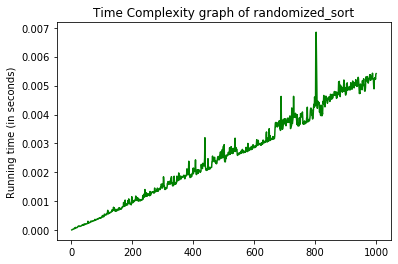

In [52]:
import matplotlib.pyplot as plt 

plt.plot(list_lengths, list_times, color = 'green') 
plt.ylabel('Running time (in seconds)')
plt.title('Time Complexity graph of randomized_sort')
plt.show()

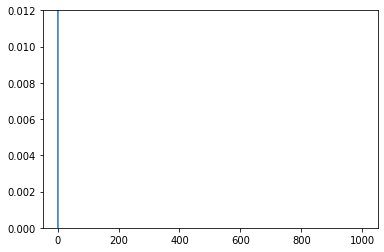

In [53]:
## I tried to plot nlog(n) to compare if 
## the time complexity above scales as O(nlogn), however I see it does not.

import math
import numpy as np
import matplotlib.pyplot as plt 

n = list_lengths
y = [nn*np.log(nn) for nn in n]
plt.ylim((0,0.012))
plt.plot(n,y,label="n*log(n)")

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. In other word, you may want to put the partition in either ```lower``` or ```upper``` list instead of using ``counts`` and ```lst[ind1:ind2] = [partition] * counts``` as we did in question 1.

In [54]:
def qsort_new(lst):
    '''
    This function takes a list as an input at implements quicksort algorithm.
    It finds a partition, then compares left elements, and right elements, with a chosen pivot element.
    '''
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        # deleted the cell here, changed the condition of lower (added =)
        #counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + 1

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition]
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

print(qsort_new([4,2,1])==[1,2,4])
print(qsort_new([0])==[0])
#print(qsort([4,4,2,2,1,1])==[1,1,2,2,4,4])
#qsort([4,4,2,2,1,1])

True
True


In [55]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([4,4,2,2,1,1])==[1,1,2,2,4,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [59]:
def randomized_quicksort_new():
    '''
    This randomized quicksort function randomizes the input (randomly shuffles it).
    It uses quicksort function after randomly shuffling the list.
    '''
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort_new(lst)

import time

## creating two lists - one for the list lengths, one for list times
list_times2 = []
list_lengths2 = list(range(1,1001))

for N in list_lengths2:
    ## a list to calculate the average time for each input list
    average_list2 = []
    ## running the for loop for the same list length 10 times
    for i in range(1,11):
        a = timeit.timeit(randomized_quicksort_new, number=1)
        average_list2.append(a)
    ## averaging it out
    b = sum(average_list2)/len(average_list2)
    ## appending to the list of times
    list_times2.append(b)

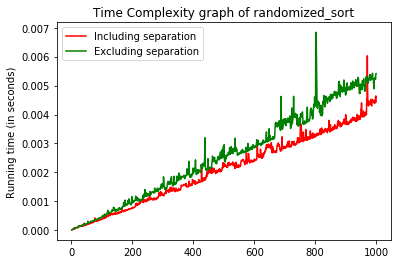

In [60]:
import matplotlib.pyplot as plt 

plt.plot(list_lengths2, list_times2, label = "Including separation", color = 'red') + plt.plot(list_lengths, list_times, label = "Excluding separation", color = 'green')  
plt.ylabel('Running time (in seconds)')
plt.title('Time Complexity graph of randomized_sort')
plt.legend()
plt.show()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [61]:
def qsort_1st(lst):
    '''
    This function takes a list as an input at implements quicksort algorithm.
    It finds a partition, then compares left elements, and right elements, with a chosen pivot element.
    '''
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        partition = lst[frm]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition]*counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

print(qsort_1st([4,2,1])==[1,2,4])
print(qsort_1st([0])==[0])
#print(qsort([4,4,2,2,1,1])==[1,1,2,2,4,4])
#qsort([4,4,2,2,1,1])

True
True


In [63]:
assert(qsort_1st([4,2,1])==[1,2,4])
assert(qsort_1st([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



The graph is presented below. On average the running time of the algorithm when choosing the first element as a pivot in this case has a slightly better time complexity, though it follows the same scaling behavior as two previous randomized quicksorts (with and without separation).

In [65]:
def randomized_quicksort_1st():
    '''
    This randomized quicksort function randomizes the input (randomly shuffles it).
    It uses quicksort function after randomly shuffling the list.
    '''
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort_1st(lst)

import time

## creating two lists - one for the list lengths, one for list times
list_times3 = []
list_lengths3 = list(range(1,1001))

for N in list_lengths3:
    ## a list to calculate the average time for each input list
    average_list3 = []
    ## running the for loop for the same list length 10 times
    for i in range(1,11):
        a = timeit.timeit(randomized_quicksort_1st, number=1)
        average_list3.append(a)
    ## averaging it out
    b = sum(average_list3)/len(average_list3)
    ## appending to the list of times
    list_times3.append(b)

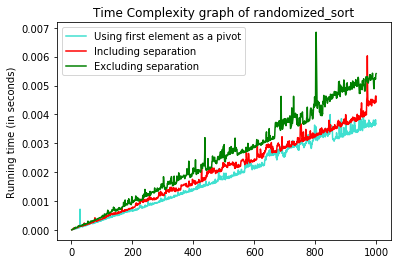

In [67]:
import matplotlib.pyplot as plt 

plt.plot(list_lengths3, list_times3, label = "Using first element as a pivot", color = 'turquoise') + plt.plot(list_lengths2, list_times2, label = "Including separation", color = 'red') + plt.plot(list_lengths, list_times, label = "Excluding separation", color = 'green')  
plt.ylabel('Running time (in seconds)')
plt.title('Time Complexity graph of randomized_sort')
plt.legend()
plt.show()

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


As are constrained by 500 recursive calls, we can only run the splits maximum of 500 times (as each single split is done with one run of recursion). The maximum array size can be derived from the number of maximum splits which, I believe, is n-1; so given 500 splits, the array size should be 500-1 = 499.